# Iris Classification

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
pwd

'C:\\Users\\HP'

In [110]:
df = pd.read_csv('Iris.csv')

In [111]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [112]:
df.shape

(150, 6)

In [113]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [115]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [116]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

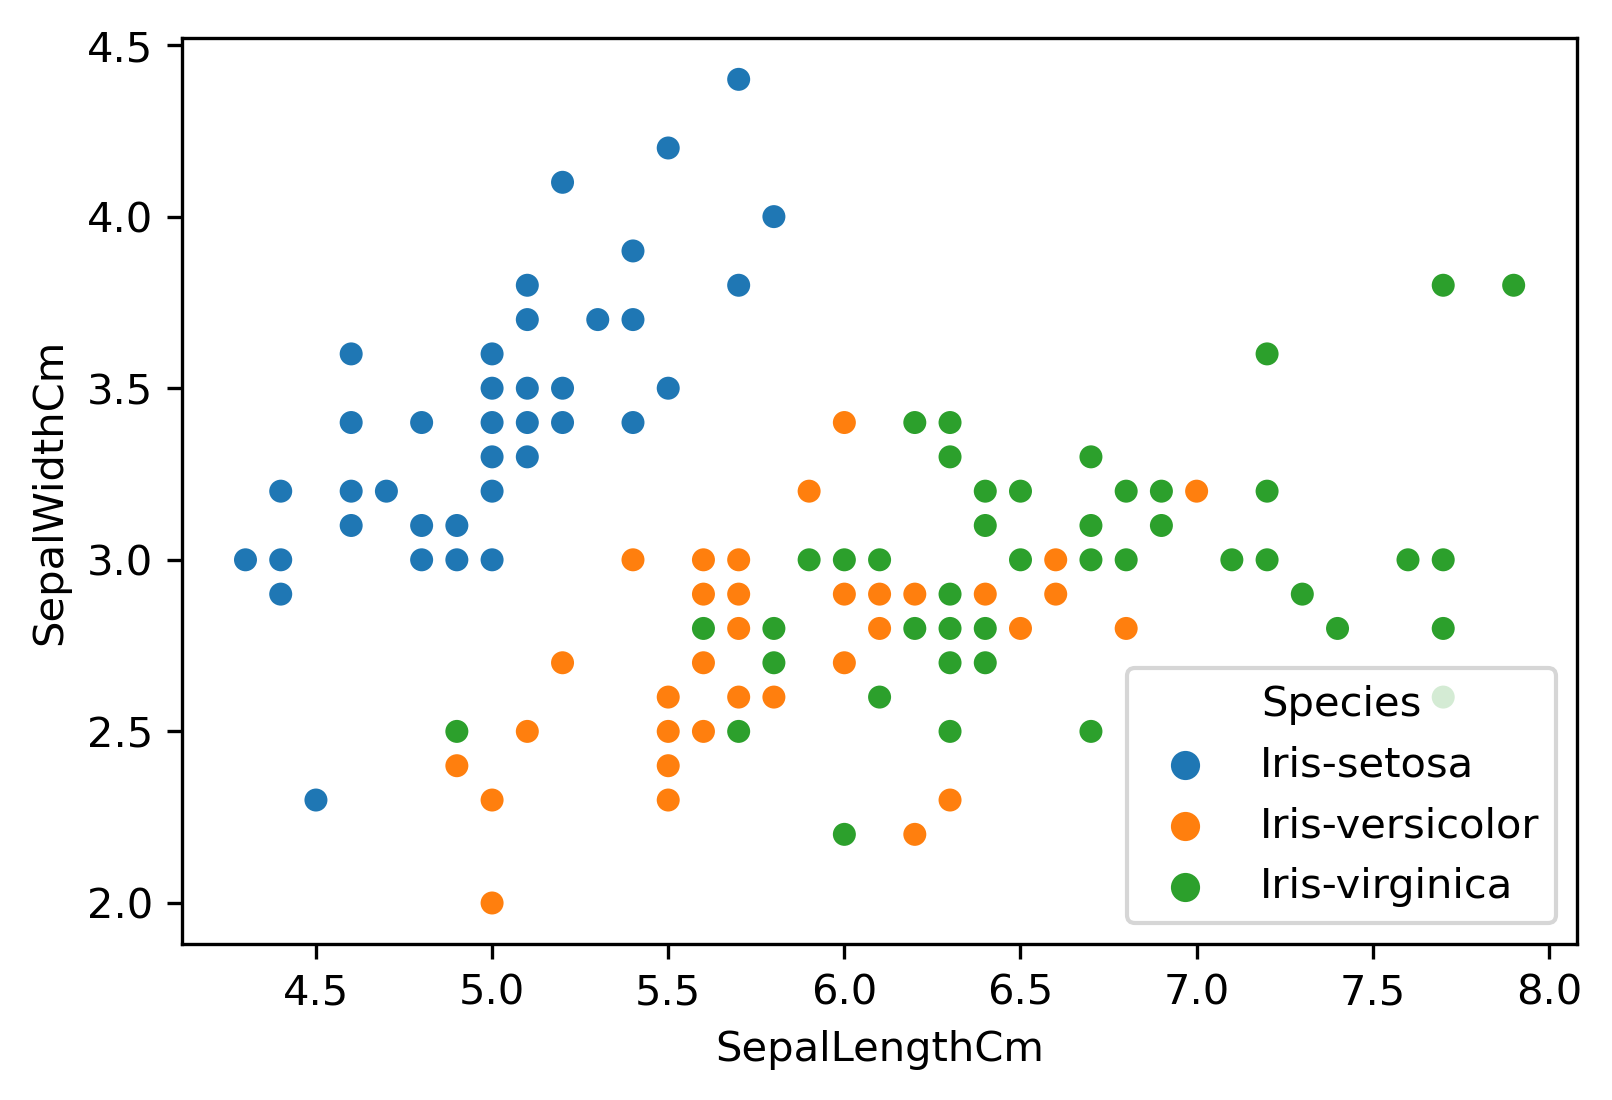

In [117]:
plt.figure(dpi=300)
sns.scatterplot(x='SepalLengthCm', y="SepalWidthCm", data = df, hue = 'Species')

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

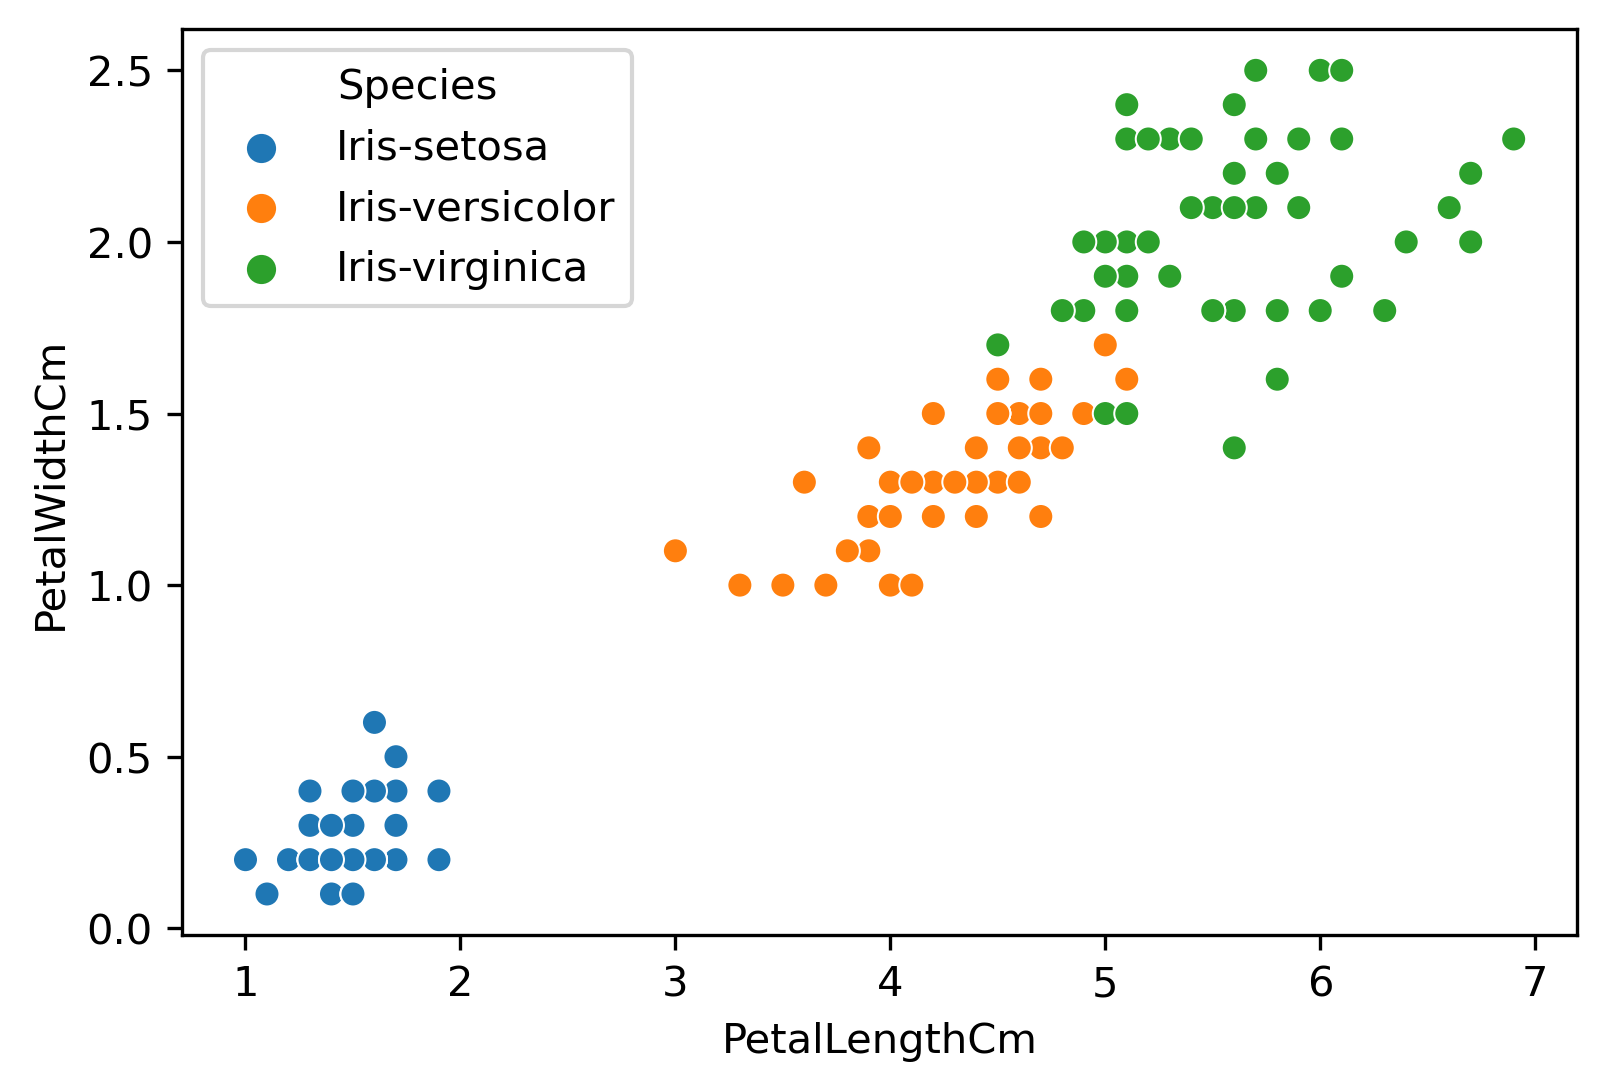

In [118]:
plt.figure(dpi=300)
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df,  hue='Species')

<Figure size 3000x1800 with 0 Axes>

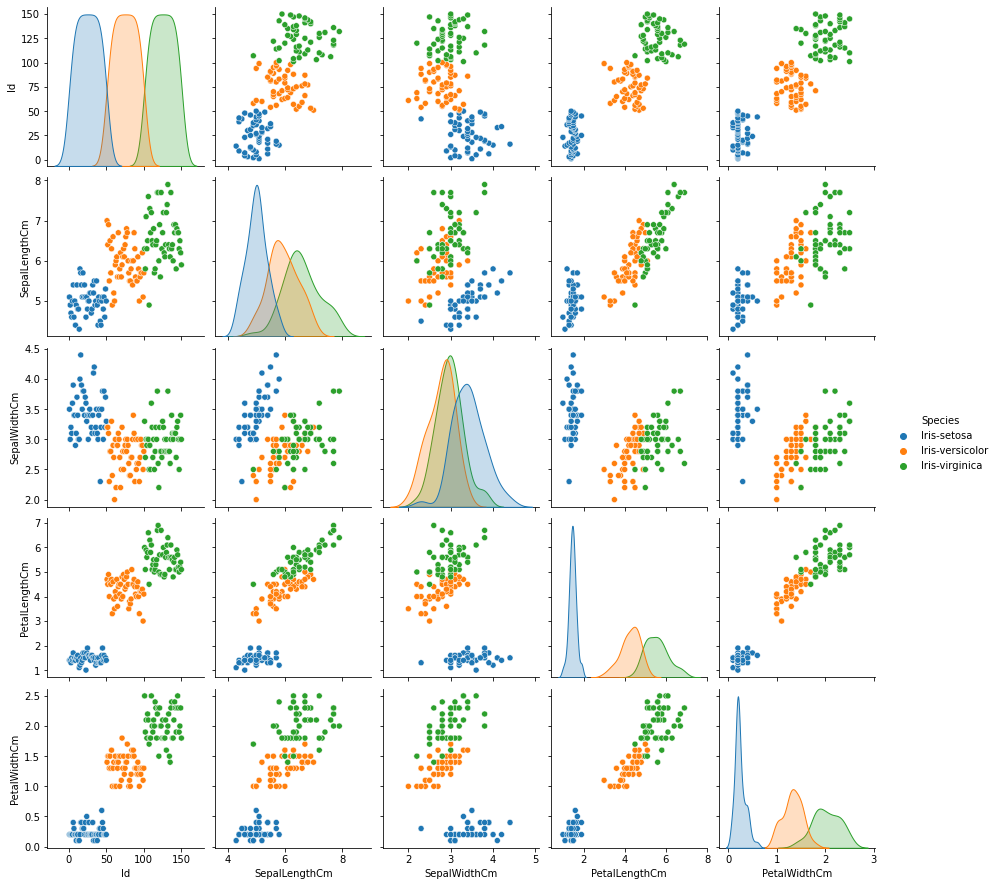

In [119]:
plt.figure(figsize=(10,6),dpi=300)
sns.pairplot(data=df, hue='Species')

In [120]:
df = df.drop('Id', axis=1)

In [121]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [122]:
X = df.drop('Species', axis=1)

In [123]:
y = df['Species']

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
scaler = StandardScaler()

In [128]:
scale_X_train = scaler.fit_transform(X_train)

In [129]:
scale_X_test =  scaler.transform(X_test)

In [130]:
from sklearn.linear_model import LogisticRegression

In [131]:
from sklearn.model_selection import GridSearchCV 

In [132]:
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

In [133]:
# Penalty Type
penalty = ['l1', 'l2']

# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 4, 10)       

In [134]:
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [135]:
grid_model.fit(scale_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [136]:
grid_model.best_params_

{'C': 21.544346900318832, 'penalty': 'l1'}

In [137]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [138]:
y_pred = grid_model.predict(scale_X_test)

In [139]:
accuracy_score(y_test, y_pred)

0.9555555555555556

In [141]:
confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0, 19,  1],
       [ 0,  1, 11]], dtype=int64)

In [142]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.95      0.95      0.95        20
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [144]:
from sklearn.metrics import roc_curve, auc

In [145]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

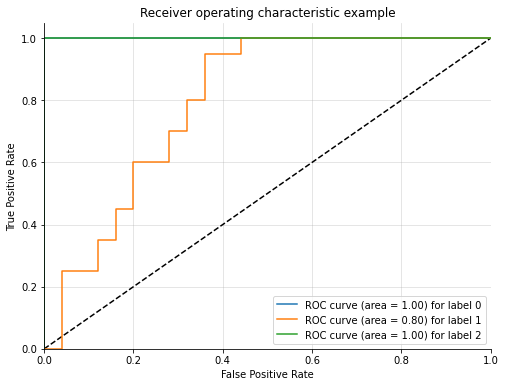

In [148]:
plot_multiclass_roc(grid_model, scale_X_test, y_test, n_classes=3, figsize=(8, 6))